<a href="https://colab.research.google.com/github/Bhandari007/bankruptcy_prediction/blob/main/bankruptcy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bankruptcy Prediction

This notebook, contains the machine learning application to predict whether a company will go bankrupt. The data is available in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data).
The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

This notebook deals with the 5<sup>th</sup> year of  forecasting period.

### This notebook will be divided into the following sections:

* Getting the Data
* Data Cleaning
* Data Exploration


# Data Dictionary
Attribute Information:

* 0 => Not Bankrupt
* 1 => Bankrupt

* X1 net profit / total assets
* X2 total liabilities / total assets
* X3 working capital / total assets
* X4 current assets / short-term liabilities
* X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
* X6 retained earnings / total assets
* X7 EBIT / total assets
* X8 book value of equity / total liabilities
* X9 sales / total assets
* X10 equity / total assets
* X11 (gross profit + extraordinary items + financial expenses) / total assets
* X12 gross profit / short-term liabilities
* X13 (gross profit + depreciation) / sales
* X14 (gross profit + interest) / total assets
* X15 (total liabilities * 365) / (gross profit + depreciation)
* X16 (gross profit + depreciation) / total liabilities
* X17 total assets / total liabilities
* X18 gross profit / total assets
* X19 gross profit / sales
* X20 (inventory * 365) / sales
* X21 sales (n) / sales (n-1)
* X22 profit on operating activities / total assets
* X23 net profit / sales
* X24 gross profit (in 3 years) / total assets
* X25 (equity - share capital) / total assets
* X26 (net profit + depreciation) / total liabilities
* X27 profit on operating activities / financial expenses
* X28 working capital / fixed assets
* X29 logarithm of total assets
* X30 (total liabilities - cash) / sales
* X31 (gross profit + interest) / sales
* X32 (current liabilities * 365) / cost of products sold
* X33 operating expenses / short-term liabilities
* X34 operating expenses / total liabilities
* X35 profit on sales / total assets
* X36 total sales / total assets
* X37 (current assets - inventories) / long-term liabilities
* X38 constant capital / total assets
* X39 profit on sales / sales
* X40 (current assets - inventory - receivables) / short-term liabilities
* X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
* X42 profit on operating activities / sales
* X43 rotation receivables + inventory turnover in days
* X44 (receivables * 365) / sales
* X45 net profit / inventory
* X46 (current assets - inventory) / short-term liabilities
* X47 (inventory * 365) / cost of products sold
* X48 EBITDA (profit on operating activities - depreciation) / total assets
* X49 EBITDA (profit on operating activities - depreciation) / sales
* X50 current assets / total liabilities
* X51 short-term liabilities / total assets
* X52 (short-term liabilities * 365) / cost of products sold)
* X53 equity / fixed assets
* X54 constant capital / fixed assets
* X55 working capital
* X56 (sales - cost of products sold) / sales
* X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
* X58 total costs /total sales
* X59 long-term liabilities / equity
* X60 sales / inventory
* X61 sales / receivables
* X62 (short-term liabilities *365) / sales
* X63 sales / short-term liabilities
* X64 sales / fixed assets

# Getting the Data

## Download data

In [1]:
!wget https://github.com/Bhandari007/bankruptcy_prediction/blob/main/data.zip?raw=true

--2022-11-13 05:40:24--  https://github.com/Bhandari007/bankruptcy_prediction/blob/main/data.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Bhandari007/bankruptcy_prediction/raw/main/data.zip [following]
--2022-11-13 05:40:24--  https://github.com/Bhandari007/bankruptcy_prediction/raw/main/data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Bhandari007/bankruptcy_prediction/main/data.zip [following]
--2022-11-13 05:40:24--  https://raw.githubusercontent.com/Bhandari007/bankruptcy_prediction/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

## Extracting the ZipFile

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("data.zip?raw=true")
zip_ref.extractall()

## Converting `arff` to `csv` file

In [9]:
from scipy.io.arff import loadarff
import pandas as pd
data = loadarff('5year.arff')
df = pd.DataFrame(data[0])
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


# Data Cleaning

## Decoding Labels

In [10]:
df["class"].value_counts()

b'0'    5500
b'1'     410
Name: class, dtype: int64

In [11]:
target = df["class"].str.decode('utf-8').astype("int")
df["target"] = target
df = df.drop(columns = ["class"], axis = 1 )
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


# Exploratory Data Analysis

### Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5907 non-null   float64
 1   Attr2   5907 non-null   float64
 2   Attr3   5907 non-null   float64
 3   Attr4   5889 non-null   float64
 4   Attr5   5899 non-null   float64
 5   Attr6   5907 non-null   float64
 6   Attr7   5907 non-null   float64
 7   Attr8   5892 non-null   float64
 8   Attr9   5909 non-null   float64
 9   Attr10  5907 non-null   float64
 10  Attr11  5907 non-null   float64
 11  Attr12  5889 non-null   float64
 12  Attr13  5910 non-null   float64
 13  Attr14  5907 non-null   float64
 14  Attr15  5904 non-null   float64
 15  Attr16  5892 non-null   float64
 16  Attr17  5892 non-null   float64
 17  Attr18  5907 non-null   float64
 18  Attr19  5910 non-null   float64
 19  Attr20  5910 non-null   float64
 20  Attr21  5807 non-null   float64
 21  Attr22  5907 non-null   float64
 22  

In [43]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,5907.000000,5907.000000,5907.000000,5889.000000,5.899000e+03,5907.000000,5907.000000,5892.000000,5909.000000,5907.000000,...,5910.000000,5907.000000,5910.000000,5907.000000,5.642000e+03,5895.000000,5910.000000,5889.000000,5803.000000,5910.000000
mean,-0.022347,0.465086,0.189155,4.892476,1.940676e+01,0.022584,-0.111951,5.737741,1.588322,0.545580,...,0.057222,-0.263837,0.956504,0.279319,9.110338e+02,10.941497,241.978184,9.127741,65.276716,0.069374
std,6.163655,5.751283,1.177729,91.434574,2.152932e+04,9.992080,9.057135,102.355101,1.548390,5.763742,...,0.698096,18.425091,0.857326,5.840554,6.415469e+04,41.166591,6221.135690,103.074304,2150.645860,0.254110
min,-463.890000,-430.870000,-72.067000,-0.403110,-1.076400e+06,-463.890000,-517.480000,-3.735100,-3.496000,-71.444000,...,-46.788000,-1236.300000,-0.164390,-184.980000,-1.244000e+01,-0.092493,-236.530000,-1.543200,-3.726500,0.000000
25%,0.003965,0.255355,0.043953,1.093700,-4.383650e+01,0.000000,0.005889,0.481865,1.014800,0.318940,...,0.010996,0.015655,0.876552,0.000000,5.248500e+00,4.278650,44.646750,3.066900,2.147500,0.000000
50%,0.046670,0.451750,0.219440,1.651700,4.914900e-01,0.000000,0.056500,1.149300,1.139700,0.523320,...,0.053218,0.109840,0.950370,0.005675,9.039500e+00,6.198900,73.778500,4.930000,4.098300,0.000000
75%,0.117050,0.661635,0.418430,2.931000,4.876500e+01,0.108725,0.136905,2.771275,1.825900,0.720805,...,0.125085,0.242910,0.990405,0.205215,1.731950e+01,9.350900,118.720000,8.115800,9.204200,0.000000
max,87.459000,72.416000,28.336000,6845.800000,1.250100e+06,543.250000,5.530000,6868.500000,65.607000,339.850000,...,1.651000,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,451380.000000,7641.300000,158180.000000,1.000000


There are some missing values that needs to be handled.

### Class Imbalance Plot

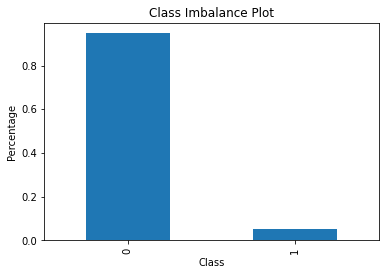

In [8]:
df["target"].value_counts(normalize = True).plot(
    kind = "bar",
    xlabel = "Class",
    ylabel = "Percentage",
    title = "Class Imbalance Plot"
)

There are significant less bankrupt companies in the dataset than the companies that didnot go bankrupt. 

### Distribution of the features

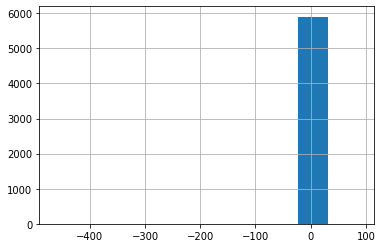

In [26]:
df["Attr1"].hist();

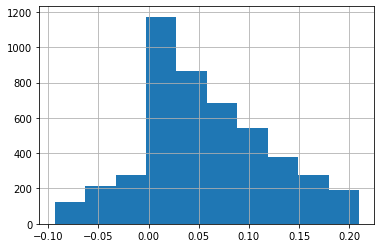

In [32]:
q1, q3 = df["Attr1"].quantile([0.1, 0.9])
df[df["Attr1"].between(q1, q3)]["Attr1"].hist();

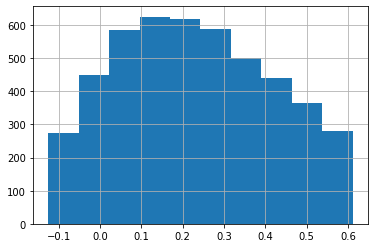

In [34]:
q1, q3 = df["Attr3"].quantile([0.1, 0.9])
df[df["Attr3"].between(q1, q3)]["Attr3"].hist();

# Split the Dataset

### Packages

In [40]:
from sklearn.model_selection import train_test_split

### Features and Target

In [38]:
target = "target"
X = df.drop(columns = [target], axis = 1)
y = df[target]

In [39]:
X.shape, y.shape

((5910, 64), (5910,))

### Train and test dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
print(f"The shape of training dataset (X) is {X_train.shape}")
print(f"The shape of training dataset (y) is {y_train.shape}")

print(f"The shape of test dataset (X) is {X_test.shape}")
print(f"The shape of test dataset (y) is {y_test.shape}")

The shape of training dataset (X) is (4728, 64)
The shape of training dataset (y) is (4728,)
The shape of test dataset (X) is (1182, 64)
The shape of test dataset (y) is (1182,)


# Sampling the Dataset

# TODO: Oversampling or undersampling for making class balance